In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score



In [26]:
def evaluate(y_pred, y_validation):
    cm = confusion_matrix(y_validation, y_pred)
    acc = accuracy_score(y_validation,y_pred)
    tn, fp, fn, tp = cm.ravel()
    recall = tp / (tp + fn)
    beta = 0.5

    if tp == 0 and fp == 0:
        precision = 0.0
        F1 = 0.0
    else:
        precision = tp / (tp + fp)
        F1 = (1+beta**2)*((precision * recall)/((beta**2 * precision) + recall))
        
    print("Confusion Matrix:")
    print("{:>10} {:>10} {:>10}".format("", "Predicted 0", "Predicted 1"))
    print("{:>10} {:>10} {:>10}".format("Actual 0", tn, fp))
    print("{:>10} {:>10} {:>10}".format("Actual 1", fn, tp))
    print("Recall:", round(recall, 3))
    print("Precision:", round(precision, 3))
    print("Accuracy:", round(acc, 4))
    print("F1 score:", round(F1, 4))


In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/leotasso3/Xtream_Tasso/main/datasets/employee-churn/churn.csv")

# Seleziona la variabile dipendente y (ultima colonna)
y = df.iloc[:, -1]

# Seleziona le feature indipendenti x
x = df.iloc[:, 1:13]

In [22]:
x=x.drop('city', axis=1)

In [23]:
# Divisione in train, validation e test set con stratificazione di y
x_train_temp, x_test, y_train_temp, y_test = train_test_split(x, y, test_size=0.15, random_state=42, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train_temp, y_train_temp, test_size=0.18, random_state=42, stratify=y_train_temp)

# Verifica della distribuzione della variabile target nei set generati
print("Distribuzione della variabile target nel train set:", y_train.value_counts(normalize=True))
print("Distribuzione della variabile target nel validation set:", y_val.value_counts(normalize=True))
print("Distribuzione della variabile target nel test set:", y_test.value_counts(normalize=True))

Distribuzione della variabile target nel train set: target
0.0    0.750674
1.0    0.249326
Name: proportion, dtype: float64
Distribuzione della variabile target nel validation set: target
0.0    0.750682
1.0    0.249318
Name: proportion, dtype: float64
Distribuzione della variabile target nel test set: target
0.0    0.750522
1.0    0.249478
Name: proportion, dtype: float64


In [24]:
categorical_columns = x_train.select_dtypes(include=['object']).columns.tolist()
x_train_encoded = pd.get_dummies(x_train, columns=categorical_columns)
x_val_encoded = pd.get_dummies(x_val, columns=categorical_columns)

Baseline results

In [25]:
model = DecisionTreeClassifier()
model.fit(x_train_encoded, y_train)
pred = model.predict(x_val_encoded)
evaluate(pred, y_val)

# Visualize decision tree
plt.figure(figsize = (15, 7.5))
tree_visuazlizaiton1 = plot_tree(model)

DecisionTreeClassifier()

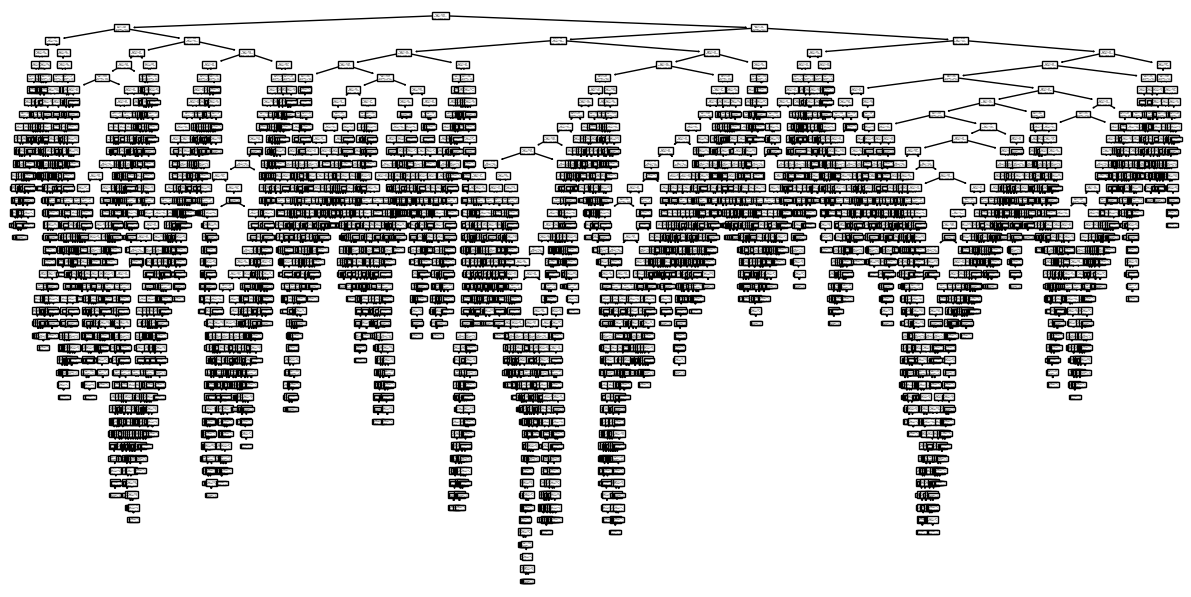

In [35]:
hyperparameters = {
    "criterion":['gini', 'entropy'],
    "max_depth":[10,15,20,30,35,40,45],
    'min_samples_split': [2, 5, 10, 20]
}

grid_search = GridSearchCV(model, param_grid = hyperparameters, cv = 10)

grid_search.fit(x_train_encoded, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30, 35, 40, 45],
                         'min_samples_split': [2, 5, 10, 20]})

In [36]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 20}

In [37]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=20)
model.fit(x_train_encoded, y_train)
pred = model.predict(x_val_encoded)
evaluate(pred, y_val)


Confusion Matrix:
           Predicted 0 Predicted 1
  Actual 0       1843        358
  Actual 1        329        402
Recall: 0.55
Precision: 0.529
Accuracy: 0.7657
F1 score: 0.533
